In [77]:
%matplotlib inline

In [29]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gp

In [4]:
import json

with open('Location History.json') as data_file:    
    data = json.load(data_file)
    
data.keys()

dict_keys(['locations'])

In [25]:
df = pd.DataFrame.from_records(data['locations'])
df['timestampMs'] = df['timestampMs'].astype('int64')
df['timestamp'] = pd.to_datetime(df['timestampMs'], unit='ms')
df.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,timestamp
0,400,NaN,NaN,NaN,407173708,-740011836,1501685816517,NaN,NaN,2017-08-02 14:56:56.517
1,400,NaN,NaN,NaN,407173708,-740011836,1501685813148,NaN,NaN,2017-08-02 14:56:53.148
2,400,NaN,NaN,NaN,407173708,-740011836,1501685773588,NaN,NaN,2017-08-02 14:56:13.588
3,400,NaN,NaN,NaN,407173708,-740011836,1501685712386,NaN,NaN,2017-08-02 14:55:12.386
4,400,NaN,NaN,NaN,407173708,-740011836,1501685578009,NaN,NaN,2017-08-02 14:52:58.009


In [31]:
df['geometry'] = df.apply(lambda r: Point(r['longitudeE7'], r['latitudeE7']), axis=1)

In [44]:
gdf = gp.GeoDataFrame(df)
gdf.crs = {'init' :'epsg:4326'}

In [21]:
df.dtypes

accuracy              int64
activity             object
altitude            float64
heading             float64
latitudeE7            int64
longitudeE7           int64
timestampMs          object
velocity            float64
verticalAccuracy    float64
dtype: object

In [20]:
df['timestampMs'].astype('int64')

0          1501685816517
1          1501685813148
2          1501685773588
3          1501685712386
4          1501685578009
5          1501685514924
6          1501685511402
7          1501685509129
8          1501685505631
9          1501685504039
10         1501685500561
11         1501685499075
12         1501685495574
13         1501685493976
14         1501685490529
15         1501685490303
16         1501685486805
17         1501685484733
18         1501685481244
19         1501685473128
20         1501685332984
21         1501685243304
22         1501685214230
23         1501685209459
24         1501685173438
25         1501685129711
26         1501685036893
27         1501684943827
28         1501684916824
29         1501684913318
               ...      
1469723    1366925357221
1469724    1366923550409
1469725    1366923490406
1469726    1366923370383
1469727    1366923310361
1469728    1366923190331
1469729    1366923010270
1469730    1366922937085
1469731    1366922806832


In [35]:
(739572680 + 739568590)/2, 739572680 - (739572680 + 739568590)/2

(739570635.0, 2045.0)

In [90]:
locations = gp.GeoDataFrame({
    'location': ['home', 'work'], 
    'geometry': [Point(-739570500, 406310500).buffer(30000), Point(-740023790, 407157170).buffer(30000)]
})
#locations['geometry'] = locations['geometry'].buffer(2200)
locations.crs = {'init' :'epsg:4326'}
locations

,geometry,location
0,"POLYGON ((-739540500 406310500, -739540644.458...",home
1,"POLYGON ((-739993790 407157170, -739993934.458...",work


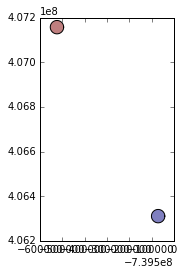

In [91]:
locations.plot()

In [92]:
joined = gp.sjoin(locations, gdf, op='contains').reset_index().sort_values('timestamp')
joined['date'] = joined['timestamp'].dt.date
joined['location_i'] = 0
joined.loc[joined['location'] == 'work', 'location_i'] = 1

joined

,index,geometry,location,index_right,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,timestamp,date,location_i
205297,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469615,30,NaN,NaN,NaN,406318554,-739576315,1366938664120,NaN,NaN,2013-04-26 01:11:04.120,2013-04-26,0
205274,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469613,30,NaN,NaN,NaN,406318554,-739576315,1366938784156,NaN,NaN,2013-04-26 01:13:04.156,2013-04-26,0
205273,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469612,30,NaN,NaN,NaN,406318554,-739576315,1366938844175,NaN,NaN,2013-04-26 01:14:04.175,2013-04-26,0
205272,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469606,30,NaN,NaN,NaN,406318554,-739576315,1366939283248,NaN,NaN,2013-04-26 01:21:23.248,2013-04-26,0
205271,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469552,30,NaN,NaN,NaN,406318554,-739576315,1366942701259,NaN,NaN,2013-04-26 02:18:21.259,2013-04-26,0
205270,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469549,30,NaN,NaN,NaN,406318554,-739576315,1366942941537,NaN,NaN,2013-04-26 02:22:21.537,2013-04-26,0
205269,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469547,30,NaN,NaN,NaN,406318554,-739576315,1366943061577,NaN,NaN,2013-04-26 02:24:21.577,2013-04-26,0
205268,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469528,30,NaN,NaN,NaN,406318554,-739576315,1366944277273,NaN,NaN,2013-04-26 02:44:37.273,2013-04-26,0
205267,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469527,30,NaN,NaN,NaN,406318554,-739576315,1366944397300,NaN,NaN,2013-04-26 02:46:37.300,2013-04-26,0
205266,0,"POLYGON ((-739540500 406310500, -739540644.458...",home,1469525,30,NaN,NaN,NaN,406318554,-739576315,1366944517336,NaN,NaN,2013-04-26 02:48:37.336,2013-04-26,0


In [93]:
joined['diff'] = joined['location_i'].diff()
joined['timediff'] = joined['timestamp'].diff()

In [81]:
joined

,index,geometry,location,index_right,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,timestamp,date,location_i,diff,timediff
3057,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469615,30,NaN,NaN,NaN,406318554,-739576315,1366938664120,NaN,NaN,2013-04-26 01:11:04.120,2013-04-26,0,NaN,NaT
3034,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469613,30,NaN,NaN,NaN,406318554,-739576315,1366938784156,NaN,NaN,2013-04-26 01:13:04.156,2013-04-26,0,0.0,00:02:00.036000
3033,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469612,30,NaN,NaN,NaN,406318554,-739576315,1366938844175,NaN,NaN,2013-04-26 01:14:04.175,2013-04-26,0,0.0,00:01:00.019000
3032,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469606,30,NaN,NaN,NaN,406318554,-739576315,1366939283248,NaN,NaN,2013-04-26 01:21:23.248,2013-04-26,0,0.0,00:07:19.073000
3031,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469552,30,NaN,NaN,NaN,406318554,-739576315,1366942701259,NaN,NaN,2013-04-26 02:18:21.259,2013-04-26,0,0.0,00:56:58.011000
3030,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469549,30,NaN,NaN,NaN,406318554,-739576315,1366942941537,NaN,NaN,2013-04-26 02:22:21.537,2013-04-26,0,0.0,00:04:00.278000
3029,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469547,30,NaN,NaN,NaN,406318554,-739576315,1366943061577,NaN,NaN,2013-04-26 02:24:21.577,2013-04-26,0,0.0,00:02:00.040000
3028,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469528,30,NaN,NaN,NaN,406318554,-739576315,1366944277273,NaN,NaN,2013-04-26 02:44:37.273,2013-04-26,0,0.0,00:20:15.696000
3027,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469527,30,NaN,NaN,NaN,406318554,-739576315,1366944397300,NaN,NaN,2013-04-26 02:46:37.300,2013-04-26,0,0.0,00:02:00.027000
3026,0,"POLYGON ((-739560500 406310500, -739560548.152...",home,1469525,30,NaN,NaN,NaN,406318554,-739576315,1366944517336,NaN,NaN,2013-04-26 02:48:37.336,2013-04-26,0,0.0,00:02:00.036000


In [82]:
joined[joined['diff'] == 1]

,index,geometry,location,index_right,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,timestamp,date,location_i,diff,timediff
44401,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,589471,13,NaN,4.0,222.0,407165108,-740021887,1470845542468,0.0,NaN,2016-08-10 16:12:22.468,2016-08-10,1,1.0,0 days 23:02:32.818000
75337,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,550513,12,NaN,8.0,142.0,407157695,-740031666,1471960419000,0.0,NaN,2016-08-23 13:53:39.000,2016-08-23,1,1.0,0 days 17:45:55.526000
70358,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,488037,12,NaN,-29.0,243.0,407166398,-740025768,1473680978000,0.0,NaN,2016-09-12 11:49:38.000,2016-09-12,1,1.0,0 days 01:15:28.845000
67755,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,484512,11,NaN,-8.0,215.0,407165913,-740023303,1473769712000,1.0,NaN,2016-09-13 12:28:32.000,2016-09-13,1,1.0,0 days 02:03:16
74753,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,480960,23,"[{'activity': [{'confidence': 100, 'type': 'ON...",NaN,NaN,407161957,-740029741,1473856187766,NaN,NaN,2016-09-14 12:29:47.766,2016-09-14,1,1.0,0 days 14:06:22.884000
30962,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,474933,23,NaN,NaN,NaN,407161818,-740023314,1474028828519,NaN,NaN,2016-09-16 12:27:08.519,2016-09-16,1,1.0,0 days 09:48:38.519000
44332,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,469768,20,"[{'activity': [{'confidence': 100, 'type': 'EX...",NaN,NaN,407161949,-740024232,1474288339923,NaN,NaN,2016-09-19 12:32:19.923,2016-09-19,1,1.0,1 days 16:11:59.773000
75523,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,460759,40,NaN,NaN,NaN,407156878,-740029042,1474549321919,NaN,NaN,2016-09-22 13:02:01.919,2016-09-22,1,1.0,0 days 15:20:05.919000
47106,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,448336,16,NaN,16.0,28.0,407164261,-740022849,1474894602000,0.0,NaN,2016-09-26 12:56:42.000,2016-09-26,1,1.0,0 days 08:06:16
47989,1,"POLYGON ((-740013790 407157170, -740013838.152...",work,443278,33,NaN,86.0,209.0,407164422,-740024162,1475067304591,0.0,NaN,2016-09-28 12:55:04.591,2016-09-28,1,1.0,0 days 01:01:42.591000


In [97]:
joined[(joined['diff'] == 1) & (joined['timediff'] < pd.Timedelta(hours=3))].describe()['timediff']

count                       219
mean     0 days 00:36:06.938753
std      0 days 00:20:05.070854
min      0 days 00:00:15.267000
25%      0 days 00:33:38.569000
50%      0 days 00:36:27.100000
75%      0 days 00:40:25.850000
max      0 days 02:41:32.607000
Name: timediff, dtype: object

In [101]:
joined[(joined['diff'] == 1) & (joined['timediff'] < pd.Timedelta(hours=3))]['timediff'].quantile(.95)

Timedelta('0 days 00:50:41.024599')